In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('../input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

In [3]:
df.rename(columns = {'sr.1':'sh'}, inplace=True)

<CENTER><h1>Main Features</h1>
sr - snoring rate</br>
rr - respiration rate</br>
t - body temperature</br>
lm - limb movement</br>
bo - blood ohygen</br>
rem - eye movement</br>
sh - sleeping hours</br>
hr - heart rate</br>
sl - stress level</CENTER>

In [4]:
df.head()

,sr,rr,t,lm,bo,rem,sh,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
df.shape

(630, 9)

In [6]:
sorted(df.sl.unique())

[0, 1, 2, 3, 4]

In [7]:
df.sl.value_counts()

3    126
1    126
0    126
2    126
4    126
Name: sl, dtype: int64

In [8]:
print("Average amount of sleep (median):",df.sh.median())

Average amount of sleep (median): 3.5


In [9]:
print("Average amount of stress (median):",df.sl.median())

Average amount of stress (median): 2.0


Now let's check for nulls

In [10]:
if not df.isnull().values.any():
    print("Nice!!!")
else:
    print("(((")

Nice!!!


MMM NICE!!!

Now let's make a couple simple plots

In [11]:
import seaborn as sns

Text(0, 0.5, 'Sleep hours')

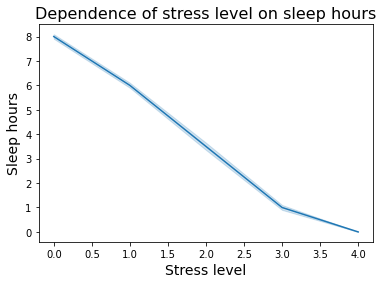

In [12]:
sleep_hours_plot = sns.lineplot(data=df, x='sl',y='sh')
sleep_hours_plot.axes.set_title("Dependence of stress level on sleep hours", fontsize=16)
sleep_hours_plot.set_xlabel("Stress level", fontsize=14)
sleep_hours_plot.set_ylabel("Sleep hours", fontsize=14)

Text(0, 0.5, 'Heart rate')

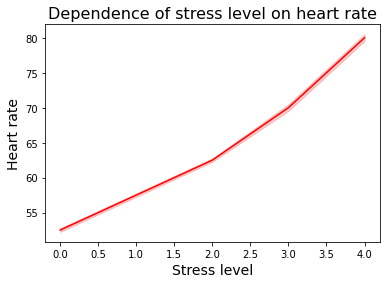

In [13]:
heart_rate_plot = sns.lineplot(data=df, x='sl',y='hr', color='red')
heart_rate_plot.axes.set_title("Dependence of stress level on heart rate", fontsize=16)
heart_rate_plot.set_xlabel("Stress level", fontsize=14)
heart_rate_plot.set_ylabel("Heart rate", fontsize=14)

Text(0, 0.5, 'Blood ohygen')

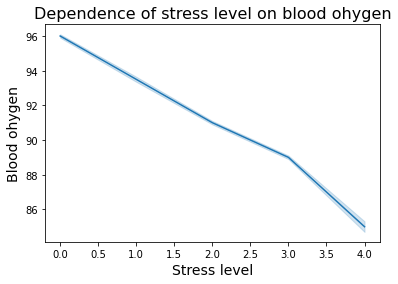

In [14]:
blood_ohygen_plot = sns.lineplot(data=df, x='sl',y='bo')
blood_ohygen_plot.axes.set_title("Dependence of stress level on blood ohygen", fontsize=16)
blood_ohygen_plot.set_xlabel("Stress level", fontsize=14)
blood_ohygen_plot.set_ylabel("Blood ohygen", fontsize=14)

<CENTER><h1>It's time to make robots work for people</h1></CENTER>

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns='sl')
y = df.sl

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.5, 
                                                    random_state=42)

In [18]:
clf = GradientBoostingClassifier(n_estimators=20, random_state = 0)

In [19]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20, random_state=0)

Now time for testing

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
y_pre = clf.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pre)
print("MSE: %.4f" % mse)
 
mae = mean_absolute_error(y_test, y_pre)
print("MAE: %.4f" % mae)
 
R2 = r2_score(y_test,y_pre)
print("R2: %.4f" % R2)

MSE: 0.0159
MAE: 0.0159
R2: 0.9918


In [23]:
print(f"Score: {clf.score(X_test, y_test)}")

Score: 0.9841269841269841


I think this is a good result. Thank you for your attention if you read this. If I have made any mistakes, then write about it in the comments. Thanks to the author of this dataset. I had fun while working on this data.</br>
<h2 align="right">See you, Spacecowboy...</h2>